# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


### INCISO (a)

In [1]:
"""
 df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto \$x_0\$.
"""
function df_derecha(f, x0, h)
    df=(f(x0+h)-f(x0))/h
    return df
end

df_derecha

In [2]:
?df_derecha()

df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto $x_0$.


In [3]:
df_derecha(x->3x^2-2,1.0,2.0^-10)

6.0029296875

### INCISO (b)

In [4]:
f(x)=3x^2-2

f (generic function with 1 method)

In [5]:
df_exac(x)=6x

df_exac (generic function with 1 method)

In [6]:
"""
 errabs()

Esta función crea los vectores x(valores de h) y y(valores de la diferencia entre la derivada derecha y exacta).
"""
function errabs(f,x_0,h,n)
    for i in 1:n
        x[i]=h
        y[i]=abs(df_exac(x_0)-df_derecha(f,x_0,h))
        h=h/2.0
    end    
end

errabs

In [7]:
using PyPlot

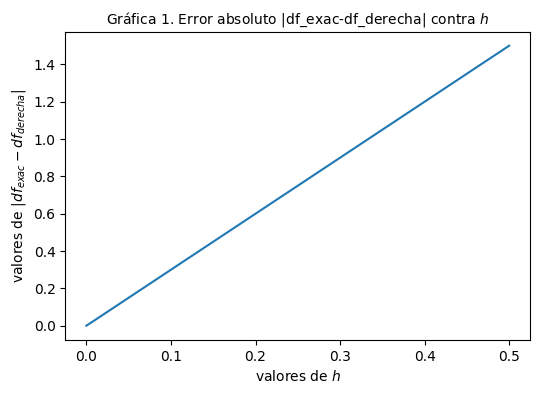

PyObject <matplotlib.text.Text object at 0x7fc5a0fb1710>

In [8]:
n=50
x_0=1.0
h=0.5
x=[i=0.0 for i=1:n]
y=[i=0.0 for i=1:n]
errabs(f,x_0,h,n)

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 1. Error absoluto |df_exac-df_derecha| contra $h$", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{derecha}|$")

*A partir de la gráfica 1, la conclusión es que al tomar valores de $h$ cada vez más cercanos al cero, es decir 
$lim_{h\to 0}$ el error es mínimo.*

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [9]:
"""
 df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h 
adelante del punto \$x_0\$ y otra atras.
"""
function df_simetrica(f, x0, h)
    df=(f(x0+h)-f(x0-h))/(2.0*h)
    return df
end

df_simetrica

In [10]:
?df_simetrica()

df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h  adelante del punto $x_0$ y otra atras.


In [11]:
df_simetrica(f, 0.5, 0.001)

3.0000000000000027

In [12]:
"""
 errabs2()

Esta función crea los vectores x(valores de h) y y(valores de la diferencia entre la derivada simétrica y exacta).
"""
function errabs2(f,x_0,h,n)
    for i in 1:n
        x[i]=h
        z[i]=abs(df_exac(x_0)-df_simetrica(f,x_0,h))
        h=h/2.0
    end    
end

errabs2

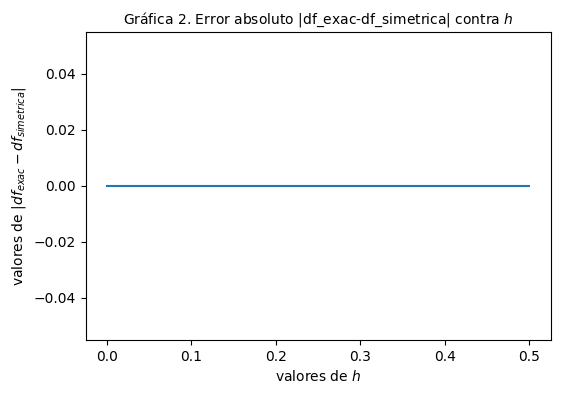

PyObject <matplotlib.text.Text object at 0x7fc5952d1ed0>

In [13]:
n=50
x_0=1.0
h=0.5
x=[i=0.0 for i=1:n]
z=[i=0.0 for i=1:n]
errabs2(f,x_0,h,n)

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,z)    # este comando pinta las componentes "y"(el error) ; 
             # en "x" se expresa el tamño de h
           # Los vectores *tienen* que tener el mismo número de elementos
title(L"Gráfica 2. Error absoluto |df_exac-df_simetrica| contra $h$", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{simetrica}|$")

*A partir de la gráfica 2, el error no existe al menos para esta función, es decir $f'(x)=\frac{f(x_0+h)-f(x_0-h)}{2h}$.*

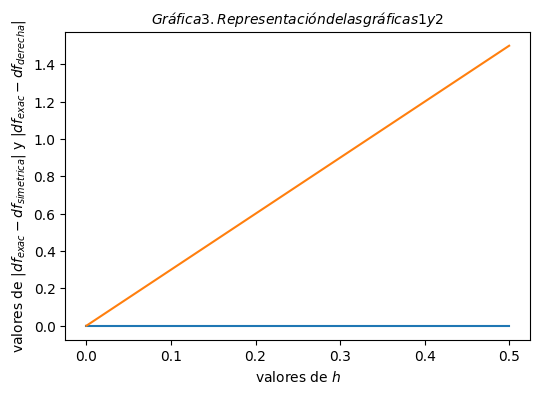

PyObject <matplotlib.text.Text object at 0x7fc5952d1190>

In [14]:
figure(figsize=(6,4))
plot(x,z)
plot(x,y)
title(L"Gráfica 3. Representación de las gráficas 1 y 2", fontsize=10)
xlabel(L"valores de $h$")
ylabel(L"valores de $|df_{exac}-df_{simetrica}|$ y $|df_{exac}-df_{derecha}|$")

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


La [derivada compleja](https://en.wikipedia.org/wiki/Complex_analysis) tiene la siguiente expresión

$$f'(z_0)=\lim_{z\rightarrow z_0}\frac{f(z)-f(z_0)}{z-z_0},\hspace{.3cm}z\in\mathbb{C}
\hspace{.3cm}\mbox{con}\hspace{.3cm}z=x+iy$$

**Teorema de Cauchy-Riemann.** *Sea $f:A\subset\mathbb{C}\rightarrow\mathbb{C}$ una función dada, con $A$ un conjunto abierto. Entonces $f'(z_0)$ existe si y sólo si $f$ es diferenciable en el sentido de las variables reales y en $(x_0,y_0)=z_0$, $u$ y $v$ satisfacen*
$$\frac{\partial u}{\partial x}=\frac{\partial v}{\partial y}\hspace{.5cm}\mbox{y}\hspace{.5cm}
\frac{\partial u}{\partial y}=-\frac{\partial v}{\partial x}$$
*(llamadas las **ecuaciones de Cauchy-Riemann**)).*

Si $f'(z_0)$ existe, entonces
$$f'(z_0)=\frac{\partial u}{\partial x}+i\frac{\partial v}{\partial x}=\frac{\partial f}{\partial x}
=\frac{\partial v}{\partial y}-i\frac{\partial u}{\partial y}
=\frac{1}{i}\frac{\partial f}{\partial y}$$

In [48]:
"""
 df_complejaderecha()

Este algoritmo calcula la derivada compleja por la derecha de una función para un una diferencia 
h dada en el punto \$z_0\$.
"""
function df_compleja(fc,z0,h)
    df=(fc(x+im*y)-fc(x0+im*y0))/(x+im*y-x0-im*y0)
    return df
end

df_compleja

In [43]:
"""
 df_complejaderecha()

Este algoritmo calcula la derivada compleja por la derecha de una función para un una diferencia 
h dada en el punto \$z_0\$.
"""
function df_complejaderecha(u,v,x0,y0,h)
    du=df_simetrica(u, x0, h)
    dv=df_simetrica(v, x0, h)
    return du+im*dv
end

df_complejaderecha

Si $f(z)=z^2$ entonces $f'(z)=2z$ 

$$f(z)=(x+iy)^2=x^2-y^2+2ixy=(x^2-y^2)+i(2xy)\hspace{2cm}f'(z)=2z=2(x+iy)$$

In [44]:
u(x)=x^2#u(x,y)=x^2-y^2 como la derivo con respecto a x (y=cte)
v(x)=2x*y0#v(x,y)=2xy como la derivo con respecto a y (x=cte)

v (generic function with 1 method)

In [45]:
df_complejaderecha(u,v,1.0,1.0,.01)

LoadError: UndefVarError: y0 not defined

In [46]:
sqrt(complex(-1+1.0*im))

0.45508986056222733 + 1.09868411346781im

In [47]:
df_derecha(u,1.0+1.0*im,.1)

2.100000000000002 + 2.0000000000000018im

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?